# **TEXT and Sentimental Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import json
import gzip

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualizations
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#import contractions
import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')



import re, string, unicodedata
from nltk.stem.lancaster import LancasterStemmer

nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer


pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Reading stop,neg and positive words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Capstone/stop_words_long.txt')]
#neg_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Capstone/neg_words.txt')]
#pos_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Capstone/pos_words.txt')]


In [4]:
df_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_reviews_p3.csv',index_col=False)

In [5]:
df_review.shape

(45420, 21)

In [6]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (df_review["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 4054978


In [33]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.2 MB/s eta 0:00:00


In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stop_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [8]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = replace_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [9]:
df_review['clean_text'] = df_review['review_text'].map(lambda text: normalize_and_lemmaize(text))



In [10]:
df_review['clean_text'][0]

'bad reception phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better phone take better picture better clarity reception cheaper moto tmobile stay ugly monster'

In [11]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (df_review["clean_text"].apply(word_tokenize)) for w in t])
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 1539754

Percentage of removed tokens: 0.62


In [ ]:
#df_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/clean_text.csv')


In [12]:
df_review.to_json('/content/drive/MyDrive/Colab Notebooks/Capstone/clean_text.json')


In [13]:
df_cleandata = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Capstone/clean_text.json')

In [14]:
df_cleandata.shape

(45420, 22)

In [15]:
#import pandas_profiling


In [ ]:
#from pandas_profiling import ProfileReport


In [ ]:
#!pip install pandas-profiling==2.7.1


In [ ]:
#pandas_profiling.ProfileReport(df_review)


In [48]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in df_cleandata['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])

['pretty', 'good', 'phone', 'improvement', 'samsung', 'decide', 'try', 'fyi', 'people', 'battery', 'problems', 'batteries', 'drain', 'completely', 'charge', 'like', 'build', 'battery', 'life', 'do', 'time', 'improve', 'battery', 'life', 'immensely', 'tmobile', 'customer', 'stay', 'no', 'customer', 'service', 'great', 'rate', 'plan', 'work', 'great', 'additional', 'feature', 'not', 'little', 'gadget', 'caller', 'id', 'pics', 'not', 'able', 'external', 'display', 'flip', 'persons', 'camera', 'flash', 'well', 'zoom', 'able', 'picture', 'gray', 'black', 'white', 'negative', 'sepia', 'sketch', 'multishot', 'well', 'lot', 'frame', 'picture', 'download', 'game', 'whereas', 'not', 'furthermore', 'game', 'actually', 'java', 'flash', 'serve', 'flashlight', 'useful', 'sometimes', 'not', 'walk', 'light', 'pretty', 'bright', 'voice', 'memo', 'nuf', 'otherwise', 'usual', 'feature', 'alarm', 'calculator', 'calendar', 'list', 'mms', 'sms', 'download', 'ringtones', 'help', 'ringtones', 'sound', 'pretty

In [49]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2

Total number of words  !!! 36489


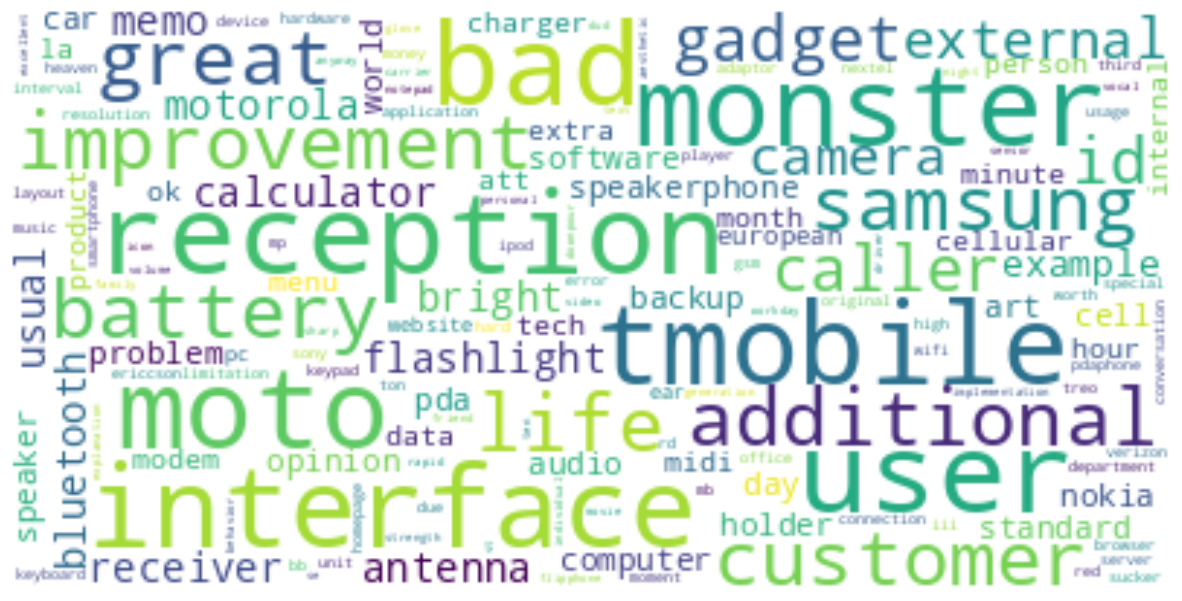

In [50]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total number of words  !!!",len(all_words5))

<Axes: >

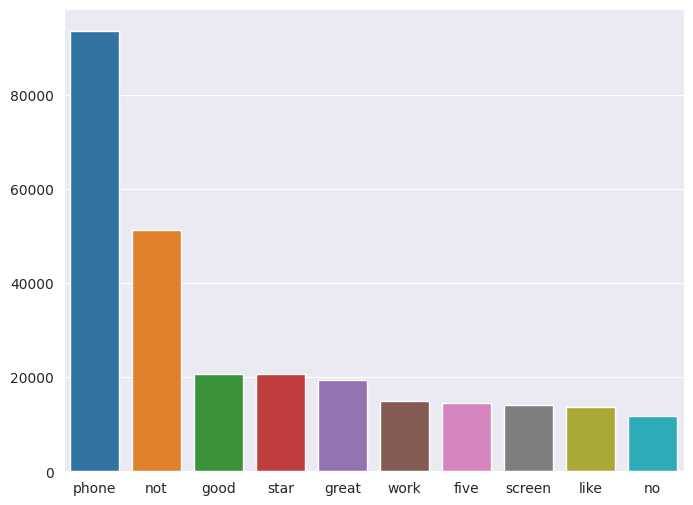

In [52]:
plt.figure(figsize = (8,6))

from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(x=Words,y=count)


In [23]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df_review['token'] = df_review['clean_text'].apply(token)

In [24]:
df_review.head()

,Unnamed: 0,Rating,verified,reviewerID,asin,style,reviewerName,DateTime,vote,review_sentiment,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,review_text,rating_class,clean_text,token
0,654,1,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,2004-09-20,2.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Bad reception This phone is ugly and heavy and...,bad,bad reception phone ugly heavy terrible user i...,"[bad, reception, phone, ugly, heavy, terrible,..."
1,655,4,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,2004-07-23,15.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Pretty good phone.. an improvement from my v20...,good,pretty good phone improvement samsung decide t...,"[pretty, good, phone, improvement, samsung, de..."
2,656,3,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,2004-07-05,11.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Not as user friendly as the Motorola V300- Thi...,good,not user friendly motorola samsung phone not m...,"[not, user, friendly, motorola, samsung, phone..."
3,657,5,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,2004-04-11,4.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,The best phone I've ever owned ..and I'm from ...,good,best phone own be europe phone network better ...,"[best, phone, own, be, europe, phone, network,..."
4,658,3,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,2004-02-18,12.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,I love the phone but it has some real problems...,good,love phone real problems phone amazingly light...,"[love, phone, real, problems, phone, amazingly..."


In [53]:
df_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_review_p4.csv',escapechar='\\')

# Sentimental Analysis

To do Sentimenatal Analysis I have dropped all un-necessary columns

In [54]:
Cleandata = df_review[['clean_text','review_sentiment']]

In [55]:
Cleandata.tail(10)

,clean_text,review_sentiment
45410,five star excellent product good seller,POSITIVE
45411,five star good,POSITIVE
45412,five star best price quality product great seller,POSITIVE
45413,phone like wear car radiator gradually heat sh...,NEGATIVE
45414,five star excellent product,POSITIVE
45415,shelle belle like funny rarely like fb reboot ...,POSITIVE
45416,five star not bad phone,POSITIVE
45417,bad iphone phone no good freeze touch power ho...,POSITIVE
45418,range price,NEGATIVE
45419,five star awesome thank love,POSITIVE


In [56]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

from nltk.classify import SklearnClassifier

from subprocess import check_output

First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. Ignoring Neutral review if any

In [57]:
# Splitting the dataset into train and test set
train, test = train_test_split(Cleandata,test_size = 0.1)
# Removing neutral sentiments
train = train[train.review_sentiment != "Neutral"]

As a next step I have separated the Positive and Negative comments of the training set in order to easily visualize their contained words. After that I cleaned the text from stopwords if any. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative review.

Positive words


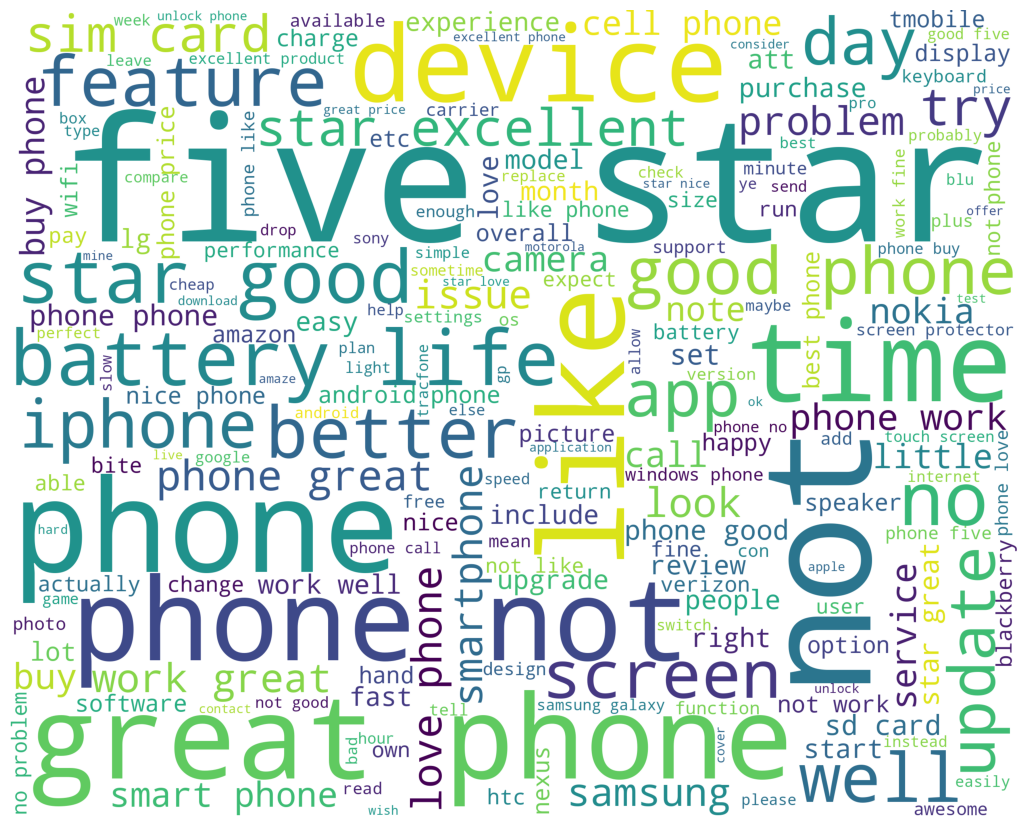

Negative words


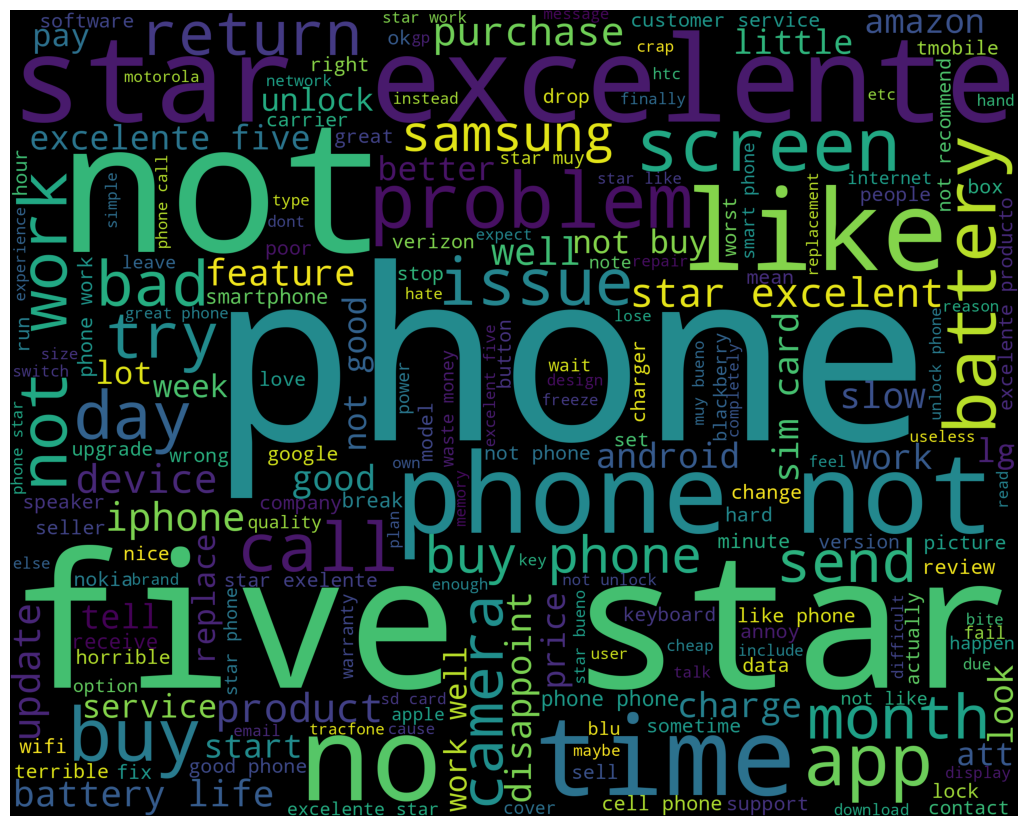

In [58]:
train_pos = train[ train['review_sentiment'] == 'POSITIVE']
train_pos = train_pos['clean_text']
train_neg = train[ train['review_sentiment'] == 'NEGATIVE']
train_neg = train_neg['clean_text']

def wordcloud_draw(Cleandata, color = 'black'):
    words = ' '.join(Cleandata)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions in the positive word set: good, star, great, look, love

At the same time, we have negative words like: bad,problem,not,return,issue, replace, phone